In [1]:
# 이거 실행하고 다시 런타임 시작
# 한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (13.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from pykrx import stock
sns.set(font='NaNumBarunGothic')

import tensorflow as tf


from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import re
pd.options.display.max_columns = None

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/핀테크 파이널/final_df.csv')


# 종목카드 6자리로 채워주기
df['Stock'] = df['Stock'].astype('int')
df['Stock'] = df['Stock'].astype('str')
df['Stock'] = df['Stock'].apply(lambda x: x.zfill(6) if len(x)!=6 else x) # 종목코드 6자리로 만들어주기
df.head(10)

,KIS,Stock,Name,총자산증가율 (2018),자기자본증가율 (2018),매출액증가율 (2018),총자본영업이익율 (2018),총자본순이익율 (2018),자본금순이익율 (2018),매출액순이익율 (2018),매출액영업이익율 (2018),자기자본비율 (2018),부채비율 (2018),유보액/납입자본비율 (2018),총자본회전율 (2018),자기자본회전율 (2018),당기순이익(손실) (2018),영업활동으로인한현금흐름 (2018),총자산증가율 (2019),자기자본증가율 (2019),매출액증가율 (2019),총자본영업이익율 (2019),총자본순이익율 (2019),자본금순이익율 (2019),매출액순이익율 (2019),매출액영업이익율 (2019),자기자본비율 (2019),부채비율 (2019),유보액/납입자본비율 (2019),총자본회전율 (2019),자기자본회전율 (2019),당기순이익(손실) (2019),영업활동으로인한현금흐름 (2019),총자산증가율 (2020),자기자본증가율 (2020),매출액증가율 (2020),총자본영업이익율 (2020),총자본순이익율 (2020),자본금순이익율 (2020),매출액순이익율 (2020),매출액영업이익율 (2020),자기자본비율 (2020),부채비율 (2020),유보액/납입자본비율 (2020),총자본회전율 (2020),자기자본회전율 (2020),당기순이익(손실) (2020),영업활동으로인한현금흐름 (2020),총자산증가율 (2021),자기자본증가율 (2021),매출액증가율 (2021),총자본영업이익율 (2021),총자본순이익율 (2021),자본금순이익율 (2021),매출액순이익율 (2021),매출액영업이익율 (2021),자기자본비율 (2021),부채비율 (2021),유보액/납입자본비율 (2021),총자본회전율 (2021),자기자본회전율 (2021),당기순이익(손실) (2021),영업활동으로인한현금흐름 (2021),2018_관리종목여부,2019_관리종목여부,2020_관리종목여부,2021_관리종목여부
0,036644,389500,(주)에스비비테크,46.03,-39.46,2.26,-5.23,-9.21,-168.76,-20.80,-11.80,20.22,394.44,340.07,0.44,1.39,-1.917031e+09,6.075800e+07,-21.16,-95.80,-34.70,-17.06,-21.67,-421.59,-79.56,-62.63,1.08,9183.55,-81.52,0.27,2.31,-4.789125e+09,-2.686112e+09,-23.07,747.37,9.76,-15.18,-19.01,-229.83,-49.59,-39.60,11.87,742.79,3.70,0.38,6.64,-3.276516e+09,-1.165070e+09,17.62,270.81,2.61,-13.65,-17.26,-138.70,-41.54,-32.85,37.41,167.32,181.23,0.42,1.62,-2.815924e+09,-1.715607e+09,0,0,0,0
1,497730,296640,(주)이노룰스,81.84,215.02,-6.23,3.88,1.43,68.58,1.90,5.16,40.95,144.17,2371.70,0.75,2.16,1.770280e+08,1.148444e+09,-1.20,32.63,43.95,17.43,3.89,210.40,4.61,20.65,54.98,81.89,2891.58,0.84,1.76,6.186920e+08,4.188603e+09,-17.63,-18.42,-20.68,8.25,11.05,519.76,14.96,11.17,54.46,83.64,3253.12,0.74,1.35,1.591312e+09,1.613872e+09,34.80,84.24,50.27,21.71,19.71,269.93,18.83,20.74,74.43,34.35,737.77,1.05,1.59,3.009484e+09,2.473444e+09,0,0,0,0
2,499459,417970,모델솔루션(주),23.53,44.46,9.65,25.30,19.34,768.48,12.97,16.97,47.94,108.60,2005.45,1.49,3.33,7.210181e+09,5.469434e+09,9.91,24.51,8.93,21.58,16.81,774.92,12.00,15.41,54.31,84.14,2521.46,1.40,2.73,7.270528e+09,1.075707e+10,-6.52,-7.50,-9.16,15.68,2.97,138.47,2.36,12.49,53.74,86.09,2324.91,1.26,2.32,1.299209e+09,8.304769e+09,14.00,18.82,9.20,18.82,15.64,391.32,11.79,14.19,56.01,78.54,907.47,1.33,2.41,7.086006e+09,9.397543e+09,0,0,0,0
3,HS8995,314140,(주)알피바이오,38.75,31.69,-5.02,8.28,5.66,146.00,6.74,9.85,58.82,70.00,1558.22,0.84,1.40,4.363446e+09,6.995499e+09,29.38,7.64,7.86,3.85,3.33,105.70,4.90,5.67,48.94,104.35,1624.67,0.68,1.28,3.423335e+09,6.582410e+09,12.53,7.59,40.18,3.37,3.75,140.12,4.71,4.25,46.79,113.72,1755.41,0.79,1.66,4.615509e+09,6.454520e+09,10.19,6.38,17.40,4.29,2.78,115.74,3.32,5.11,45.17,121.38,1873.56,0.84,1.83,3.812561e+09,9.459383e+09,0,0,0,0
4,867055,129920,(주)대성하이텍,8.36,26.30,7.67,3.96,1.57,162.88,2.10,5.32,38.03,162.97,4012.35,0.74,2.10,1.865670e+09,8.755060e+08,2.05,9.07,-17.48,4.13,2.48,254.75,4.24,7.07,40.64,146.04,3888.07,0.58,1.49,3.099913e+09,-5.228960e+09,-6.44,-38.57,-0.67,-6.91,-9.59,-910.80,-16.15,-11.63,26.69,274.72,2349.90,0.59,1.75,-1.173379e+10,1.280408e+10,20.71,-1.84,41.38,8.96,5.71,681.58,7.26,11.38,21.70,360.80,3342.41,0.79,3.28,7.457426e+09,8.944090e+08,0,0,0,0
5,E66612,368600,(주)아이씨에이치,35.25,165.42,-5.52,20.84,19.83,864.26,20.93,21.99,47.88,108.85,1386.58,0.95,2.50,2.463152e+09,4.191430e+08,29.27,58.12,41.93,31.43,24.28,863.99,23.79,30.81,58.57,70.75,2250.57,1.02,1.89,3.974339e+09,2.987910e+09,72.09,-4.17,-1.77,11.23,3.65,200.72,5.59,17.20,32.61,206.62,2184.20,0.65,1.55,9.169160e+08,1.707418e+09,50.91,147.17,41.83,2.65,3.80,110.00,6.51,4.54,53.42,87.20,1013.46,0.58,1.29,1.514619e+09,6.811970e+09,0,0,0,0
6,IO9843,365340,성일하이텍(주),42.94,47.71,50.40,19.89,16.20,318.06,11.13,13.67,41.05,143.59,848.30,1.46,3.59,9.262334e+09,2.746387e+09,46.24,49.29,-44.39,-11.85,-13.75,-358.38,-24.61,-21.21,41.91,138.61,1097.89,0.56,1.34,-1.138546e+10,-3.660696e+09,45.54,-55.20,30.77,-5.26,-1.82,-69.03,-3.62,-10.50,12.90,67

In [8]:
df['총자산증가율 (2018)']

0        46.03
1        81.84
2        23.53
3        38.75
4         8.36
         ...  
1274    146.31
1275     42.14
1276    -12.94
1277    -22.34
1278     -2.81
Name: 총자산증가율 (2018), Length: 1279, dtype: float64

In [4]:
df.columns

Index(['KIS', 'Stock', 'Name', '총자산증가율 (2018)', '자기자본증가율 (2018)',
       '매출액증가율 (2018)', '총자본영업이익율 (2018)', '총자본순이익율 (2018)', '자본금순이익율 (2018)',
       '매출액순이익율 (2018)', '매출액영업이익율 (2018)', '자기자본비율 (2018)', '부채비율 (2018)',
       '유보액/납입자본비율 (2018)', '총자본회전율 (2018)', '자기자본회전율 (2018)',
       '당기순이익(손실) (2018)', '영업활동으로인한현금흐름 (2018)', '총자산증가율 (2019)',
       '자기자본증가율 (2019)', '매출액증가율 (2019)', '총자본영업이익율 (2019)', '총자본순이익율 (2019)',
       '자본금순이익율 (2019)', '매출액순이익율 (2019)', '매출액영업이익율 (2019)', '자기자본비율 (2019)',
       '부채비율 (2019)', '유보액/납입자본비율 (2019)', '총자본회전율 (2019)', '자기자본회전율 (2019)',
       '당기순이익(손실) (2019)', '영업활동으로인한현금흐름 (2019)', '총자산증가율 (2020)',
       '자기자본증가율 (2020)', '매출액증가율 (2020)', '총자본영업이익율 (2020)', '총자본순이익율 (2020)',
       '자본금순이익율 (2020)', '매출액순이익율 (2020)', '매출액영업이익율 (2020)', '자기자본비율 (2020)',
       '부채비율 (2020)', '유보액/납입자본비율 (2020)', '총자본회전율 (2020)', '자기자본회전율 (2020)',
       '당기순이익(손실) (2020)', '영업활동으로인한현금흐름 (2020)', '총자산증가율 (2021)',
       '자기자본증가율 (2021)', '매출액증가율 (2021)', '

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 71 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   KIS                  1279 non-null   object 
 1   Stock                1279 non-null   object 
 2   Name                 1279 non-null   object 
 3   총자산증가율 (2018)        1279 non-null   float64
 4   자기자본증가율 (2018)       1279 non-null   float64
 5   매출액증가율 (2018)        1279 non-null   float64
 6   총자본영업이익율 (2018)      1279 non-null   float64
 7   총자본순이익율 (2018)       1279 non-null   float64
 8   자본금순이익율 (2018)       1279 non-null   float64
 9   매출액순이익율 (2018)       1279 non-null   float64
 10  매출액영업이익율 (2018)      1279 non-null   float64
 11  자기자본비율 (2018)        1279 non-null   float64
 12  부채비율 (2018)          1279 non-null   float64
 13  유보액/납입자본비율 (2018)    1279 non-null   float64
 14  총자본회전율 (2018)        1279 non-null   float64
 15  자기자본회전율 (2018)       1279 non-null   f

In [70]:
df = pd.read_csv('/content/drive/MyDrive/핀테크 파이널/final_df.csv')


# 종목카드 6자리로 채워주기
df['Stock'] = df['Stock'].astype('int')
df['Stock'] = df['Stock'].astype('str')
df['Stock'] = df['Stock'].apply(lambda x: x.zfill(6) if len(x)!=6 else x) # 종목코드 6자리로 만들어주기

# bining 적용
def make_bining(df):
  year = ['2018','2019', '2020', '2021']
  for y in year:

    for col in df.columns:

      if y in col:

        # 성장성
        if '총자산증가율' in col:
          총자산증가율 = col
        if '자기자본증가율' in col:
          자기자본증가율 = col
        if '매출액증가율' in col:
          매출액증가율 = col

        # 안정성
        if '자기자본비율' in col:
          자기자본비율 = col
        if '부채비율' in col:
          부채비율 = col
        if '유보액/납입자본비율' in col:
          유보율 = col
        
        # 활동성
        if '총자본회전율' in col:
          총자본회전율 = col
        if '자기자본회전율' in col:
          자기자본회전율 = col
        
        # 수익성
        if '총자본영업이익율' in col:
          총자본영업이익율 = col
        if '총자본순이익율' in col:
          총자본순이익율 = col
        if '자본금순이익율' in col:
          자본금순이익율 = col
        if '매출액순이익율' in col:
          매출액순이익율 = col
        if '매출액영업이익율' in col:
          매출액영업이익율 = col
        
        # 현금흐름
        if '당기순이익' in col:
          당기순이익 = col
        if '영업활동으로인한현금흐름' in col:
          영업활동으로인한현금흐름 = col

    # # 일단 0으로 초기화
    # df[f'성장성{y}'] =0
    # df[f'안정성{y}'] =0
    # df[f'활동성{y}'] =0
    # df[f'수익성{y}'] =0

    # 성장성
    df[f'성장성{y}_x1'] = df.apply(lambda x: 1 if x[f'{총자산증가율}'] >= 0 else 0, axis=1)
    df[f'성장성{y}_x2'] = df.apply(lambda x: 1 if x[f'{매출액증가율}'] >= 0 else 0, axis=1)
    df[f'성장성{y}'] = df[f'성장성{y}_x1'] + df[f'성장성{y}_x2']
    df.drop([f'성장성{y}_x1', f'성장성{y}_x2'],axis=1, inplace=True)

    # 안정성
    df[f'안정성{y}_x1'] = df.apply(lambda x: 1 if x[f'{자기자본비율}'] >= 30 else 0, axis=1)
    df[f'안정성{y}_x2'] = df.apply(lambda x: 1 if x[f'{부채비율}'] < 100 else 0, axis=1)
    df[f'안정성{y}_x3'] = df.apply(lambda x: 1 if x[f'{유보율}'] >= 300 else 0, axis=1)
    df[f'안정성{y}'] = df[f'안정성{y}_x1'] + df[f'안정성{y}_x2'] + df[f'안정성{y}_x3']
    df.drop([f'안정성{y}_x1', f'안정성{y}_x2', f'안정성{y}_x3'],axis=1, inplace=True)

    # 활동성
    df[f'활동성{y}_x1'] = df.apply(lambda x: 1 if x[f'{총자본회전율}'] >= 0.2 else 0, axis=1)
    df[f'활동성{y}_x2'] = df.apply(lambda x: 1 if x[f'{자기자본회전율}'] >= 0.1 else 0, axis=1)
    df[f'활동성{y}'] = df[f'활동성{y}_x1'] + df[f'활동성{y}_x2']
    df.drop([f'활동성{y}_x1', f'활동성{y}_x2'],axis=1, inplace=True)

    # 수익성
    df[f'수익성{y}_x1'] = df.apply(lambda x: 1 if x[f'{총자본영업이익율}'] >= 0 else 0, axis=1)
    df[f'수익성{y}_x2'] = df.apply(lambda x: 1 if x[f'{총자본순이익율}'] >= 0 else 0, axis=1)
    df[f'수익성{y}_x3'] = df.apply(lambda x: 1 if x[f'{자본금순이익율}'] >= 0 else 0, axis=1)
    df[f'수익성{y}_x4'] = df.apply(lambda x: 1 if x[f'{매출액순이익율}'] >= 10 else 0, axis=1)
    df[f'수익성{y}_x5'] = df.apply(lambda x: 1 if x[f'{매출액영업이익율}'] >= 15 else 0, axis=1)
    df[f'수익성{y}'] = df[f'수익성{y}_x1'] + df[f'수익성{y}_x2'] + df[f'수익성{y}_x3'] + df[f'수익성{y}_x4']+ df[f'수익성{y}_x5'] 
    df.drop([f'수익성{y}_x1', f'수익성{y}_x2', f'수익성{y}_x3', f'수익성{y}_x4', f'수익성{y}_x5'] ,axis=1, inplace=True)


    # 현금흐름
    df[f'현금흐름{y}_x1'] = df.apply(lambda x: 1 if x[f'{당기순이익}'] > 0 else 0, axis=1)
    df[f'현금흐름{y}_x2'] = df.apply(lambda x: 1 if x[f'{영업활동으로인한현금흐름}'] > 0 else 0, axis=1)
    df[f'현금흐름{y}'] = df[f'현금흐름{y}_x1'] + df[f'현금흐름{y}_x2']
    df.drop([f'현금흐름{y}_x1', f'현금흐름{y}_x2'],axis=1, inplace=True)

  return df


df2 = make_bining(df)

In [71]:
additional_data = pd.read_csv('/content/drive/MyDrive/핀테크 파이널/data/additional_data.csv')
additional_data.fillna(0, inplace=True)

In [72]:
final_df = pd.concat([df2, additional_data], axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Columns: 119 entries, KIS to 투자주의환기종목
dtypes: float64(72), int64(44), object(3)
memory usage: 1.2+ MB


In [79]:
print(df2['성장성2018'].value_counts())
print(df2['안정성2018'].value_counts())
print(df2['활동성2018'].value_counts())
print(df2['수익성2018'].value_counts())
print(df2['현금흐름2018'].value_counts())

2    607
1    427
0    245
Name: 성장성2018, dtype: int64
3    814
2    329
1     97
0     39
Name: 안정성2018, dtype: int64
2    1178
1      67
0      34
Name: 활동성2018, dtype: int64
3    521
0    280
5    207
4    133
1    108
2     30
Name: 수익성2018, dtype: int64
2    716
1    331
0    232
Name: 현금흐름2018, dtype: int64


In [80]:
print(df2['성장성2019'].value_counts())
print(df2['안정성2019'].value_counts())
print(df2['활동성2019'].value_counts())
print(df2['수익성2019'].value_counts())
print(df2['현금흐름2019'].value_counts())

2    619
1    433
0    227
Name: 성장성2019, dtype: int64
3    821
2    316
1    109
0     33
Name: 안정성2019, dtype: int64
2    1173
1      66
0      40
Name: 활동성2019, dtype: int64
3    511
0    274
5    185
4    146
1    129
2     34
Name: 수익성2019, dtype: int64
2    743
1    322
0    214
Name: 현금흐름2019, dtype: int64


In [75]:
print(df['성장성2020'].value_counts())
print(df['안정성2020'].value_counts())
print(df['활동성2020'].value_counts())
print(df['수익성2020'].value_counts())
print(df['현금흐름2020'].value_counts())

2    530
1    474
0    275
Name: 성장성2020, dtype: int64
3    835
2    334
1     84
0     26
Name: 안정성2020, dtype: int64
2    1151
1      89
0      39
Name: 활동성2020, dtype: int64
3    467
0    308
5    202
1    144
4    119
2     39
Name: 수익성2020, dtype: int64
2    722
1    326
0    231
Name: 현금흐름2020, dtype: int64


In [81]:
print(df2['성장성2021'].value_counts())
print(df2['안정성2021'].value_counts())
print(df2['활동성2021'].value_counts())
print(df2['수익성2021'].value_counts())
print(df2['현금흐름2021'].value_counts())

2    800
1    346
0    133
Name: 성장성2021, dtype: int64
3    869
2    307
1     78
0     25
Name: 안정성2021, dtype: int64
2    1143
1      91
0      45
Name: 활동성2021, dtype: int64
3    440
0    279
5    230
4    190
1     96
2     44
Name: 수익성2021, dtype: int64
2    724
1    312
0    243
Name: 현금흐름2021, dtype: int64


In [77]:
# df3 = df2[['Stock', '성장성2018', '성장성2019', '성장성2020', '성장성2021', '수익성2018', '수익성2019',
#        '수익성2020', '수익성2021', '안정성2018', '안정성2019', '안정성2020', '안정성2021',
#        '활동성2018', '현금흐름2018', '활동성2019', '현금흐름2019', '활동성2020', '현금흐름2020',
#        '활동성2021', '현금흐름2021']]

# df3

,Stock,성장성2018,성장성2019,성장성2020,성장성2021,수익성2018,수익성2019,수익성2020,수익성2021,안정성2018,안정성2019,안정성2020,안정성2021,활동성2018,현금흐름2018,활동성2019,현금흐름2019,활동성2020,현금흐름2020,활동성2021,현금흐름2021
0,389500,2,0,1,2,0,0,0,0,1,0,0,1,2,1,2,0,2,0,2,0
1,296640,1,1,0,2,3,4,4,5,2,3,3,3,2,2,2,2,2,2,2,2
2,417970,2,2,0,2,5,5,3,4,2,3,3,3,2,2,2,2,2,2,2,2
3,314140,1,2,2,2,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2
4,129920,2,1,0,2,3,3,0,3,2,2,1,1,2,2,2,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,950110,2,1,2,1,5,1,5,4,1,1,1,0,2,2,2,1,2,2,1,1
1275,046970,2,1,0,1,1,1,0,4,1,1,1,2,2,1,2,1,2,1,2,1
1276,113810,0,2,1,0,0,3,0,2,1,1,1,1,2,0,2,2,2,1,2,2
1277,155650,1,0,0,2,3,0,3,3,3,3,3,3,2,1,2,0,2,2,2,2


In [82]:
final_df

,KIS,Stock,Name,총자산증가율 (2018),자기자본증가율 (2018),매출액증가율 (2018),총자본영업이익율 (2018),총자본순이익율 (2018),자본금순이익율 (2018),매출액순이익율 (2018),매출액영업이익율 (2018),자기자본비율 (2018),부채비율 (2018),유보액/납입자본비율 (2018),총자본회전율 (2018),자기자본회전율 (2018),당기순이익(손실) (2018),영업활동으로인한현금흐름 (2018),총자산증가율 (2019),자기자본증가율 (2019),매출액증가율 (2019),총자본영업이익율 (2019),총자본순이익율 (2019),자본금순이익율 (2019),매출액순이익율 (2019),매출액영업이익율 (2019),자기자본비율 (2019),부채비율 (2019),유보액/납입자본비율 (2019),총자본회전율 (2019),자기자본회전율 (2019),당기순이익(손실) (2019),영업활동으로인한현금흐름 (2019),총자산증가율 (2020),자기자본증가율 (2020),매출액증가율 (2020),총자본영업이익율 (2020),총자본순이익율 (2020),자본금순이익율 (2020),매출액순이익율 (2020),매출액영업이익율 (2020),자기자본비율 (2020),부채비율 (2020),유보액/납입자본비율 (2020),총자본회전율 (2020),자기자본회전율 (2020),당기순이익(손실) (2020),영업활동으로인한현금흐름 (2020),총자산증가율 (2021),자기자본증가율 (2021),매출액증가율 (2021),총자본영업이익율 (2021),총자본순이익율 (2021),자본금순이익율 (2021),매출액순이익율 (2021),매출액영업이익율 (2021),자기자본비율 (2021),부채비율 (2021),유보액/납입자본비율 (2021),총자본회전율 (2021),자기자본회전율 (2021),당기순이익(손실) (2021),영업활동으로인한현금흐름 (2021),2018_관리종목여부,2019_관리종목여부,2020_관리종목여부,2021_관리종목여부,성장성2018,안정성2018,활동성2018,수익성2018,현금흐름2018,성장성2019,안정성2019,활동성2019,수익성2019,현금흐름2019,성장성2020,안정성2020,활동성2020,수익성2020,현금흐름2020,성장성2021,안정성2021,활동성2021,수익성2021,현금흐름2021,2018_Z,2019_Z,2020_Z,2021_Z,2018_부실기업판별_알Z,2019_부실기업판별_알Z,2020_부실기업판별_알Z,2021_부실기업판별_알Z,2018_부도확률_o,2019_부도확률_o,2020_부도확률_o,2021_부도확률_o,2018_F_score,2019_F_score,2020_F_score,2021_F_score,2018_K,2019_K,2020_K,2021_K,2018_부실여부판단_K,2019_부실여부판단_K,2020_부실여부판단_K,2021_부실여부판단_K,업종,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목
0,036644,389500,(주)에스비비테크,46.03,-39.46,2.26,-5.23,-9.21,-168.76,-20.80,-11.80,20.22,394.44,340.07,0.44,1.39,-1.917031e+09,6.075800e+07,-21.16,-95.80,-34.70,-17.06,-21.67,-421.59,-79.56,-62.63,1.08,9183.55,-81.52,0.27,2.31,-4.789125e+09,-2.686112e+09,-23.07,747.37,9.76,-15.18,-19.01,-229.83,-49.59,-39.60,11.87,742.79,3.70,0.38,6.64,-3.276516e+09,-1.165070e+09,17.62,270.81,2.61,-13.65,-17.26,-138.70,-41.54,-32.85,37.41,167.32,181.23,0.42,1.62,-2.815924e+09,-1.715607e+09,0,0,0,0,2,1,2,0,1,0,0,2,0,0,1,0,2,0,0,2,1,2,0,0,0.000000,0.000000,0.000000,0.000000,3,3,3,3,0.023564,0.100115,0.111845,0.013678,1,0,1,1,14.593801,8.665832,5.088312,4.963409,2,2,2,2,2,0,0,0,0,0,0,0
1,497730,296640,(주)이노룰스,81.84,215.02,-6.23,3.88,1.43,68.58,1.90,5.16,40.95,144.17,2371.70,0.75,2.16,1.770280e+08,1.148444e+09,-1.20,32.63,43.95,17.43,3.89,210.40,4.61,20.65,54.98,81.89,2891.58,0.84,1.76,6.186920e+08,4.188603e+09,-17.63,-18.42,-20.68,8.25,11.05,519.76,14.96,11.17,54.46,83.64,3253.12,0.74,1.35,1.591312e+09,1.613872e+09,34.80,84.24,50.27,21.71,19.71,269.93,18.83,20.74,74.43,34.35,737.77,1.05,1.59,3.009484e+09,2.473444e+09,0,0,0,0,1,2,2,3,2,1,3,2,4,2,0,3,2,4,2,2,3,2,5,2,0.000000,0.000000,0.000000,0.000000,3,3,3,3,0.006766,0.000753,0.000615,0.000043,1,2,1,1,17.328700,18.460090,19.907774,23.272621,2,2,2,2,1,0,0,0,0,0,0,0
2,499459,417970,모델솔루션(주),23.53,44.46,9.65,25.30,19.34,768.48,12.97,16.97,47.94,108.60,2005.45,1.49,3.33,7.210181e+09,5.469434e+09,9.91,24.51,8.93,21.58,16.81,774.92,12.00,15.41,54.31,84.14,2521.46,1.40,2.73,7.270528e+09,1.075707e+10,-6.52,-7.50,-9.16,15.68,2.97,138.47,2.36,12.49,53.74,86.09,2324.91,1.26,2.32,1.299209e+09,8.304769e+09,14.00,18.82,9.20,18.82,15.64,391.32,11.79,14.19,56.01,78.54,907.47,1.33,2.41,7.086006e+09,9.397543e+09,0,0,0,0,2,2,2,5,2,2,3,2,5,2,0,3,2,3,2,2,3,2,4,2,0.000000,0.000000,0.000000,0.000000,3,3,3,3,0.000343,0.000377,0.001301,0.000141,1,1,1,2,26.200702,27.279234,26.704971,27.549903,2,2,2,2,2,0,0,0,0,0,0,0
3,HS8995,314140,(주)알피바이오,38.75,31.69,-5.02,8.28,5.66,146.00,6.74,9.85,58.82,70.00,1558.22,0.84,1.40,4.363446e+09,6.995499e+09,29.38,7.64,7.86,3.85,3.33,105.70,4.90,5.67,48.94,104.35,1624.67,0.68,1.28,3.423335e+09,6.582410e+09,12.53,7.59,40.18,3.37,3.75,140.12,4.71,4.25,46.79,113.72,1755.41,0.79,1.66,4.615509e+09,6.454520e+09,10.19,6.38,17.40,4.29,2.78,115.74,3.32,5.11,45.17,121.38,1873.56,0.84,1.83,3.812561e+09,9.459383e+09,0,0,0,0,1,3,2,3,2,2,2,2,3,2,2,2,2,3,2,2,2,2,3,2,0.000000,0.000000,0.000000,0.000000,3,3,3,3,0.000461,0.001132,0.001356,0.001619,1,1,2,2,21.578064,21.158629,22.112463,

In [83]:
# 비재무 데이터 따로 뽑아내기
no_financial_df = final_df[['자본잠식', '벌금', '불성실공시', '소송', '영업정지', '특허', '투자주의환기종목', '업종']]


df_base = final_df[['Stock']]
df_2018 = pd.concat([df_base,final_df[[col for col in final_df.columns if '2018' in col]]], axis=1)
df_2018 = pd.concat([df_2018, no_financial_df], axis=1)

df_2019 = pd.concat([df_base,final_df[[col for col in final_df.columns if '2019' in col]]], axis=1)
df_2019 = pd.concat([df_2019, no_financial_df], axis=1)

df_2020 = pd.concat([df_base,final_df[[col for col in final_df.columns if '2020' in col]]], axis=1)
df_2020 = pd.concat([df_2020, no_financial_df], axis=1)

df_2021 = pd.concat([df_base,final_df[[col for col in final_df.columns if '2021' in col]]], axis=1)
df_2021 = pd.concat([df_2021, no_financial_df], axis=1)

In [84]:
df_2018

,Stock,총자산증가율 (2018),자기자본증가율 (2018),매출액증가율 (2018),총자본영업이익율 (2018),총자본순이익율 (2018),자본금순이익율 (2018),매출액순이익율 (2018),매출액영업이익율 (2018),자기자본비율 (2018),부채비율 (2018),유보액/납입자본비율 (2018),총자본회전율 (2018),자기자본회전율 (2018),당기순이익(손실) (2018),영업활동으로인한현금흐름 (2018),2018_관리종목여부,성장성2018,안정성2018,활동성2018,수익성2018,현금흐름2018,2018_Z,2018_부실기업판별_알Z,2018_부도확률_o,2018_F_score,2018_K,2018_부실여부판단_K,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목,업종
0,389500,46.03,-39.46,2.26,-5.23,-9.21,-168.76,-20.80,-11.80,20.22,394.44,340.07,0.44,1.39,-1.917031e+09,6.075800e+07,0,2,1,2,0,1,0.000000,3,0.023564,1,14.593801,2,0,0,0,0,0,0,0,2
1,296640,81.84,215.02,-6.23,3.88,1.43,68.58,1.90,5.16,40.95,144.17,2371.70,0.75,2.16,1.770280e+08,1.148444e+09,0,1,2,2,3,2,0.000000,3,0.006766,1,17.328700,2,0,0,0,0,0,0,0,1
2,417970,23.53,44.46,9.65,25.30,19.34,768.48,12.97,16.97,47.94,108.60,2005.45,1.49,3.33,7.210181e+09,5.469434e+09,0,2,2,2,5,2,0.000000,3,0.000343,1,26.200702,2,0,0,0,0,0,0,0,2
3,314140,38.75,31.69,-5.02,8.28,5.66,146.00,6.74,9.85,58.82,70.00,1558.22,0.84,1.40,4.363446e+09,6.995499e+09,0,1,3,2,3,2,0.000000,3,0.000461,1,21.578064,2,0,0,0,0,0,0,0,2
4,129920,8.36,26.30,7.67,3.96,1.57,162.88,2.10,5.32,38.03,162.97,4012.35,0.74,2.10,1.865670e+09,8.755060e+08,0,2,2,2,3,2,0.000000,3,0.001602,1,20.705556,2,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,950110,146.31,77.94,10.83,8.05,7.49,24.84,16.69,17.92,45.68,118.91,93.99,0.45,0.88,3.963095e+09,2.682301e+09,0,2,1,2,5,2,2.995899,0,0.002614,1,18.371803,2,0,0,0,0,0,0,0,1
1275,046970,42.14,8.83,92.45,4.43,-0.55,-2.82,-1.06,8.50,48.09,107.95,194.50,0.52,0.96,-3.391840e+08,2.333764e+09,0,2,1,2,1,1,1.289412,2,0.001526,1,15.139504,2,0,0,0,1,0,1,1,5
1276,113810,-12.94,6.17,-29.81,-3.98,-16.02,-87.40,-31.83,-7.91,38.61,158.99,63.05,0.50,1.44,-1.185408e+10,-3.781308e+09,1,0,1,2,0,0,0.494274,2,0.008549,1,15.393361,2,0,0,0,0,0,0,1,2
1277,155650,-22.34,13.57,59.47,10.09,7.46,196.38,6.33,8.55,50.08,99.67,800.95,1.18,2.87,1.464977e+10,-8.380533e+09,0,1,3,2,3,1,3.506547,0,0.000483,1,26.703552,2,0,0,0,0,0,0,0,2


In [85]:
df_2019

,Stock,총자산증가율 (2019),자기자본증가율 (2019),매출액증가율 (2019),총자본영업이익율 (2019),총자본순이익율 (2019),자본금순이익율 (2019),매출액순이익율 (2019),매출액영업이익율 (2019),자기자본비율 (2019),부채비율 (2019),유보액/납입자본비율 (2019),총자본회전율 (2019),자기자본회전율 (2019),당기순이익(손실) (2019),영업활동으로인한현금흐름 (2019),2019_관리종목여부,성장성2019,안정성2019,활동성2019,수익성2019,현금흐름2019,2019_Z,2019_부실기업판별_알Z,2019_부도확률_o,2019_F_score,2019_K,2019_부실여부판단_K,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목,업종
0,389500,-21.16,-95.80,-34.70,-17.06,-21.67,-421.59,-79.56,-62.63,1.08,9183.55,-81.52,0.27,2.31,-4.789125e+09,-2.686112e+09,0,0,0,2,0,0,0.000000,3,0.100115,0,8.665832,2,0,0,0,0,0,0,0,2
1,296640,-1.20,32.63,43.95,17.43,3.89,210.40,4.61,20.65,54.98,81.89,2891.58,0.84,1.76,6.186920e+08,4.188603e+09,0,1,3,2,4,2,0.000000,3,0.000753,2,18.460090,2,0,0,0,0,0,0,0,1
2,417970,9.91,24.51,8.93,21.58,16.81,774.92,12.00,15.41,54.31,84.14,2521.46,1.40,2.73,7.270528e+09,1.075707e+10,0,2,3,2,5,2,0.000000,3,0.000377,1,27.279234,2,0,0,0,0,0,0,0,2
3,314140,29.38,7.64,7.86,3.85,3.33,105.70,4.90,5.67,48.94,104.35,1624.67,0.68,1.28,3.423335e+09,6.582410e+09,0,2,2,2,3,2,0.000000,3,0.001132,1,21.158629,2,0,0,0,0,0,0,0,2
4,129920,2.05,9.07,-17.48,4.13,2.48,254.75,4.24,7.07,40.64,146.04,3888.07,0.58,1.49,3.099913e+09,-5.228960e+09,0,1,2,2,3,1,0.000000,3,0.001027,1,21.683563,2,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,950110,0.36,3.69,-9.68,2.30,-0.17,-0.62,-0.59,8.09,47.20,111.87,100.17,0.28,0.61,-1.268170e+08,3.725843e+09,0,1,1,2,1,1,3.942799,0,0.002129,1,16.240915,2,0,0,0,0,0,0,0,1
1275,046970,-0.43,-19.09,217.55,0.32,-11.97,-67.22,-8.47,0.23,39.08,155.90,126.44,1.41,3.24,-8.603656e+09,1.597561e+09,0,1,1,2,1,1,1.650250,2,0.014925,1,15.784827,2,0,0,0,1,0,1,1,5
1276,113810,2.65,9.68,6.59,3.77,3.12,13.36,5.49,6.63,41.25,142.41,78.82,0.57,1.42,2.180337e+09,2.726582e+09,0,2,1,2,3,2,0.746953,2,0.001837,1,16.460994,2,0,0,0,0,0,0,1,2
1277,155650,-27.33,-6.80,-29.90,-3.49,-1.69,-25.00,-1.54,-3.18,64.23,55.70,746.97,1.10,1.96,-2.496629e+09,-1.223279e+10,0,0,3,2,0,0,3.499731,0,0.000594,0,27.441614,2,0,0,0,0,0,0,0,2


In [86]:
df_2020

,Stock,총자산증가율 (2020),자기자본증가율 (2020),매출액증가율 (2020),총자본영업이익율 (2020),총자본순이익율 (2020),자본금순이익율 (2020),매출액순이익율 (2020),매출액영업이익율 (2020),자기자본비율 (2020),부채비율 (2020),유보액/납입자본비율 (2020),총자본회전율 (2020),자기자본회전율 (2020),당기순이익(손실) (2020),영업활동으로인한현금흐름 (2020),2020_관리종목여부,성장성2020,안정성2020,활동성2020,수익성2020,현금흐름2020,2020_Z,2020_부실기업판별_알Z,2020_부도확률_o,2020_F_score,2020_K,2020_부실여부판단_K,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목,업종
0,389500,-23.07,747.37,9.76,-15.18,-19.01,-229.83,-49.59,-39.60,11.87,742.79,3.70,0.38,6.64,-3.276516e+09,-1.165070e+09,0,1,0,2,0,0,0.000000,3,0.111845,1,5.088312,2,0,0,0,0,0,0,0,2
1,296640,-17.63,-18.42,-20.68,8.25,11.05,519.76,14.96,11.17,54.46,83.64,3253.12,0.74,1.35,1.591312e+09,1.613872e+09,0,0,3,2,4,2,0.000000,3,0.000615,1,19.907774,2,0,0,0,0,0,0,0,1
2,417970,-6.52,-7.50,-9.16,15.68,2.97,138.47,2.36,12.49,53.74,86.09,2324.91,1.26,2.32,1.299209e+09,8.304769e+09,0,0,3,2,3,2,0.000000,3,0.001301,1,26.704971,2,0,0,0,0,0,0,0,2
3,314140,12.53,7.59,40.18,3.37,3.75,140.12,4.71,4.25,46.79,113.72,1755.41,0.79,1.66,4.615509e+09,6.454520e+09,0,2,2,2,3,2,0.000000,3,0.001356,2,22.112463,2,0,0,0,0,0,0,0,2
4,129920,-6.44,-38.57,-0.67,-6.91,-9.59,-910.80,-16.15,-11.63,26.69,274.72,2349.90,0.59,1.75,-1.173379e+10,1.280408e+10,0,0,1,2,0,1,0.000000,3,0.010579,1,19.080335,2,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,950110,74.60,20.05,42.48,8.60,7.44,37.52,25.24,29.18,32.45,208.15,134.93,0.29,0.78,7.710943e+09,3.268879e+09,0,2,1,2,5,2,2.596882,1,0.003236,1,17.178026,2,0,0,0,0,0,0,0,1
1275,046970,-18.92,-30.55,-4.12,-0.39,-17.91,-85.22,-11.94,-0.26,33.47,198.77,51.52,1.50,4.10,-1.162556e+10,9.402770e+08,0,0,1,2,0,1,1.154469,2,0.023673,1,11.533181,2,0,0,0,1,0,1,1,5
1276,113810,-10.39,-27.27,24.96,-0.54,-11.28,-46.36,-15.25,-0.73,33.48,198.66,30.06,0.74,1.97,-7.563931e+09,1.054284e+09,0,1,1,2,0,1,0.601730,2,0.013107,1,14.954061,2,0,0,0,0,0,0,1,2
1277,155650,-13.46,5.52,-10.29,8.82,6.49,75.52,5.18,7.04,78.31,27.69,831.23,1.25,1.77,7.542107e+09,1.091851e+10,0,0,3,2,3,2,7.871761,0,0.000024,2,29.868662,2,0,0,0,0,0,0,0,2


In [87]:
df_2021

,Stock,총자산증가율 (2021),자기자본증가율 (2021),매출액증가율 (2021),총자본영업이익율 (2021),총자본순이익율 (2021),자본금순이익율 (2021),매출액순이익율 (2021),매출액영업이익율 (2021),자기자본비율 (2021),부채비율 (2021),유보액/납입자본비율 (2021),총자본회전율 (2021),자기자본회전율 (2021),당기순이익(손실) (2021),영업활동으로인한현금흐름 (2021),2021_관리종목여부,성장성2021,안정성2021,활동성2021,수익성2021,현금흐름2021,2021_Z,2021_부실기업판별_알Z,2021_부도확률_o,2021_F_score,2021_K,2021_부실여부판단_K,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목,업종
0,389500,17.62,270.81,2.61,-13.65,-17.26,-138.70,-41.54,-32.85,37.41,167.32,181.23,0.42,1.62,-2.815924e+09,-1.715607e+09,0,2,1,2,0,0,0.000000,3,0.013678,1,4.963409,2,0,0,0,0,0,0,0,2
1,296640,34.80,84.24,50.27,21.71,19.71,269.93,18.83,20.74,74.43,34.35,737.77,1.05,1.59,3.009484e+09,2.473444e+09,0,2,3,2,5,2,0.000000,3,0.000043,1,23.272621,2,0,0,0,0,0,0,0,1
2,417970,14.00,18.82,9.20,18.82,15.64,391.32,11.79,14.19,56.01,78.54,907.47,1.33,2.41,7.086006e+09,9.397543e+09,0,2,3,2,4,2,0.000000,3,0.000141,2,27.549903,2,0,0,0,0,0,0,0,2
3,314140,10.19,6.38,17.40,4.29,2.78,115.74,3.32,5.11,45.17,121.38,1873.56,0.84,1.83,3.812561e+09,9.459383e+09,0,2,2,2,3,2,0.000000,3,0.001619,2,22.604285,2,0,0,0,0,0,0,0,2
4,129920,20.71,-1.84,41.38,8.96,5.71,681.58,7.26,11.38,21.70,360.80,3342.41,0.79,3.28,7.457426e+09,8.944090e+08,0,2,1,2,3,2,0.000000,3,0.002832,1,21.842416,2,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,950110,78.37,-3.08,-3.40,0.92,3.84,34.32,23.90,5.72,17.63,467.08,117.88,0.16,0.70,7.052749e+09,-8.972330e+10,0,1,0,1,4,1,0.965841,2,0.005466,1,15.903376,2,0,0,0,0,0,0,0,1
1275,046970,2.98,99.94,-0.77,5.31,22.63,88.70,13.82,3.24,64.99,53.87,154.51,1.64,3.31,1.335246e+10,-2.713149e+09,1,1,2,2,4,1,3.323928,0,0.000051,1,15.822916,2,0,0,0,1,0,1,1,5
1276,113810,-1.44,-4.48,-0.65,-1.02,0.04,0.16,0.05,-1.31,32.45,208.15,24.23,0.78,2.38,2.625700e+07,2.652719e+09,0,0,1,2,2,2,0.806495,2,0.002698,1,14.801748,2,0,0,0,0,0,0,1,2
1277,155650,4.66,7.88,22.56,10.32,8.13,89.91,5.03,6.38,80.72,23.88,897.93,1.62,2.03,8.979293e+09,6.462723e+09,0,2,3,2,3,2,7.915767,0,0.000030,1,31.194817,2,0,0,0,0,0,0,0,2


In [88]:
col_name = ['Stock', '총자산증가율', '자기자본증가율', '매출액증가율', '총자본영업이익율', '총자본순이익율', '자본금순이익율', '매출액순이익율', '매출액영업이익율', '자기자본비율', '부채비율', '유보액/납입자본비율', '총자본회전율', '자기자본회전율',' 당기순이익(손실)', '영업활동으로인한현금흐름', '관리종목여부', '성장성', '안정성', '활동성', '수익성','현금흐름','Z_score', '부실기업판별_Z_score', '부도확률_O_score', 'F_score', 'K_score', '부실기업판별_K_score', '자본잠식', '벌금','불성실공시','소송','영업정지','특허','투자주의환기종목','업종']

real_df = pd.DataFrame(columns = col_name)

# Concat을 위해dataframe 컬럼명 변경
df_2018.columns = col_name
df_2019.columns = col_name
df_2020.columns = col_name
df_2021.columns = col_name

real_df = pd.concat([real_df, df_2018], axis=0)
real_df = pd.concat([real_df, df_2019], axis=0)
real_df = pd.concat([real_df, df_2020], axis=0)
real_df = pd.concat([real_df, df_2021], axis=0).reset_index(drop=True)



# 문자열 수치형 변환
for i in real_df.columns[1:]:
  real_df[i] = real_df[i].astype('float')

# 타겟값 맨마지막으로 빼주기
y = real_df['관리종목여부'].values
real_df.drop('관리종목여부', axis=1, inplace=True)
real_df['관리종목여부'] = y

In [89]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stock           5116 non-null   object 
 1   총자산증가율          5116 non-null   float64
 2   자기자본증가율         5116 non-null   float64
 3   매출액증가율          5116 non-null   float64
 4   총자본영업이익율        5116 non-null   float64
 5   총자본순이익율         5116 non-null   float64
 6   자본금순이익율         5116 non-null   float64
 7   매출액순이익율         5116 non-null   float64
 8   매출액영업이익율        5116 non-null   float64
 9   자기자본비율          5116 non-null   float64
 10  부채비율            5116 non-null   float64
 11  유보액/납입자본비율      5116 non-null   float64
 12  총자본회전율          5116 non-null   float64
 13  자기자본회전율         5116 non-null   float64
 14   당기순이익(손실)      5116 non-null   float64
 15  영업활동으로인한현금흐름    5116 non-null   float64
 16  성장성             5116 non-null   float64
 17  안정성             5116 non-null   f

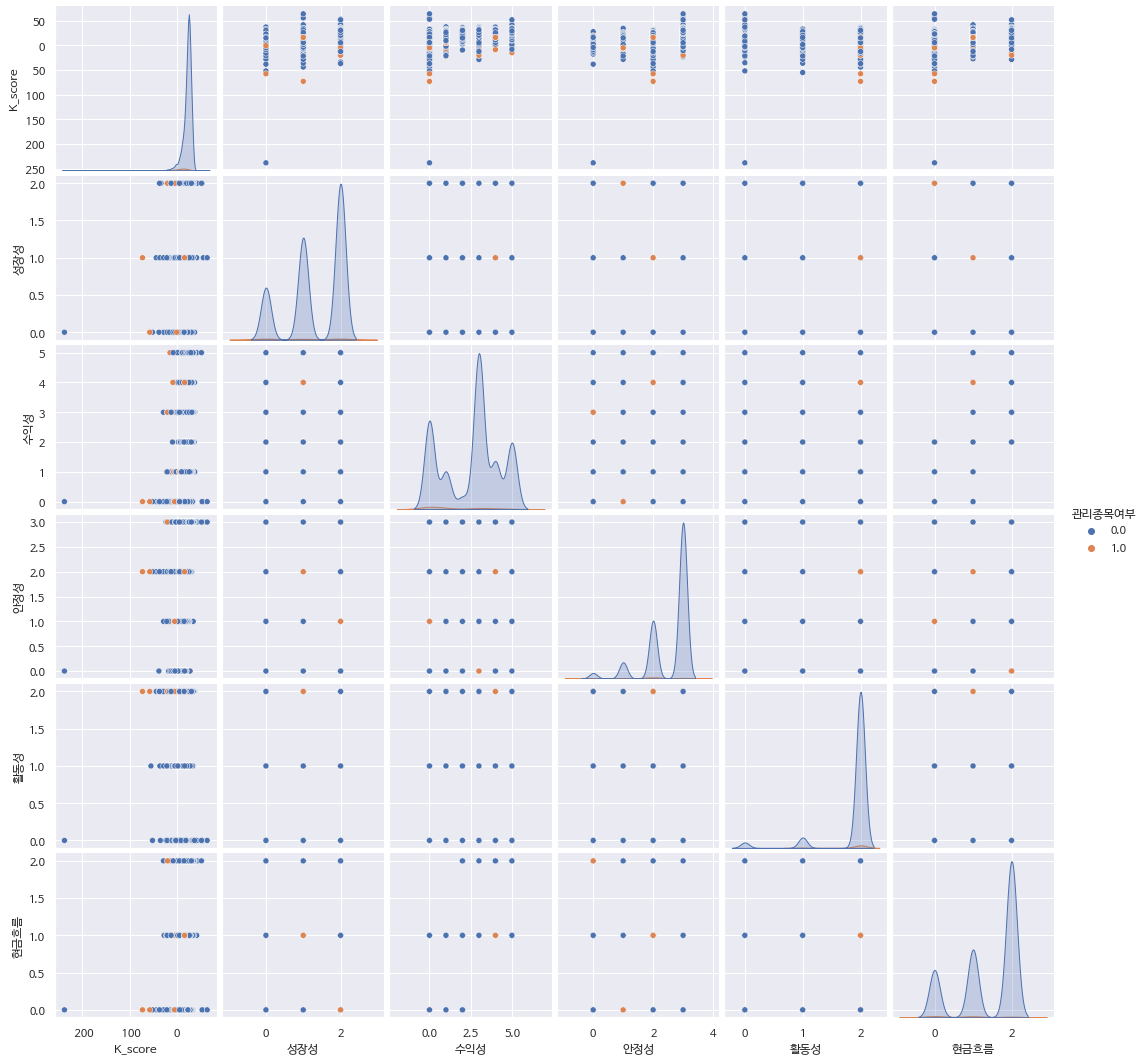

In [93]:
# 한글 폰트 사용을 위해서 세팅
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(real_df[['K_score','성장성', '수익성','관리종목여부','안정성', '활동성', '현금흐름']],hue="관리종목여부")

# K_score 시각화

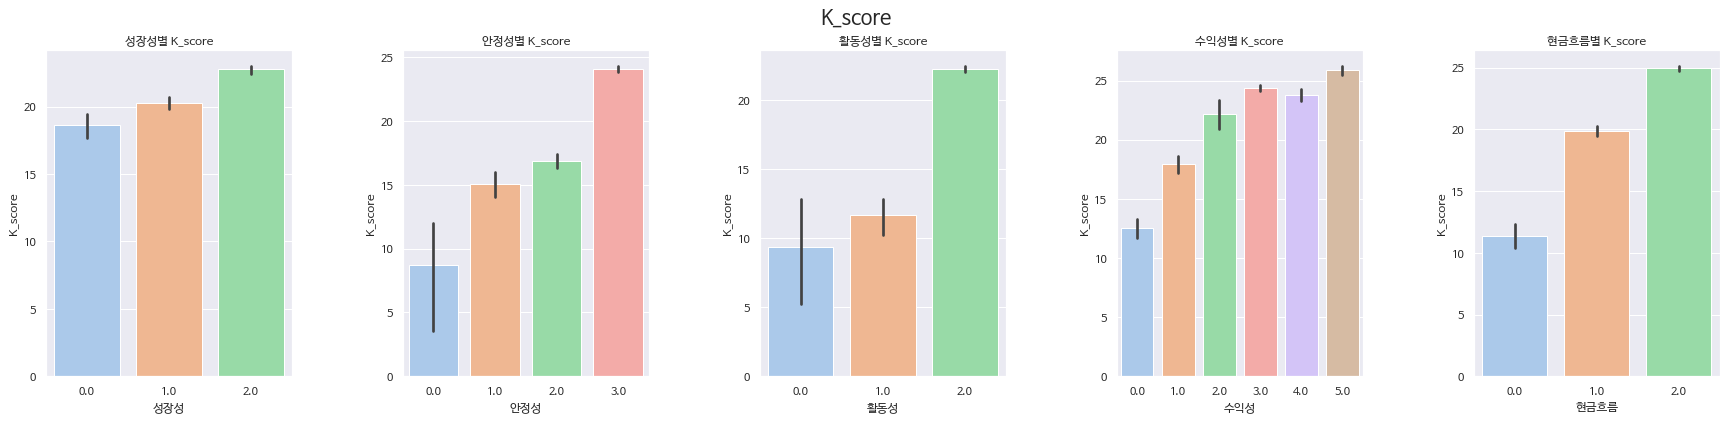

In [138]:
sns.set_palette('pastel')
fig, axes = plt.subplots(1, 5, figsize=(30, 6))
ax1 = sns.barplot(x = '성장성', y='K_score', data = real_df,ax=axes[0])
ax1.set_title('성장성별 K_score')
ax1.set(xlabel = '성장성', ylabel = 'K_score')

ax1 = sns.barplot(x = '안정성', y='K_score', data = real_df,ax=axes[1])
ax1.set_title('안정성별 K_score')
ax1.set(xlabel = '안정성', ylabel = 'K_score')

ax1 = sns.barplot(x = '활동성', y='K_score', data = real_df,ax=axes[2])
ax1.set_title('활동성별 K_score')
ax1.set(xlabel = '활동성', ylabel = 'K_score')

ax1 = sns.barplot(x = '수익성', y='K_score', data = real_df,ax=axes[3])
ax1.set_title('수익성별 K_score')
ax1.set(xlabel = '수익성', ylabel = 'K_score')

ax1 = sns.barplot(x = '현금흐름', y='K_score', data = real_df,ax=axes[4])
ax1.set_title('현금흐름별 K_score')
ax1.set(xlabel = '현금흐름', ylabel = 'K_score')


plt.suptitle('K_score', fontsize= 20)

plt.subplots_adjust(wspace = 0.45, hspace=0.45)

plt.show()

# Z_score 시각화
- Z score는 코스닥 기업에 유의미하게 나타나지 않음. -> 모델링할 때 기각.

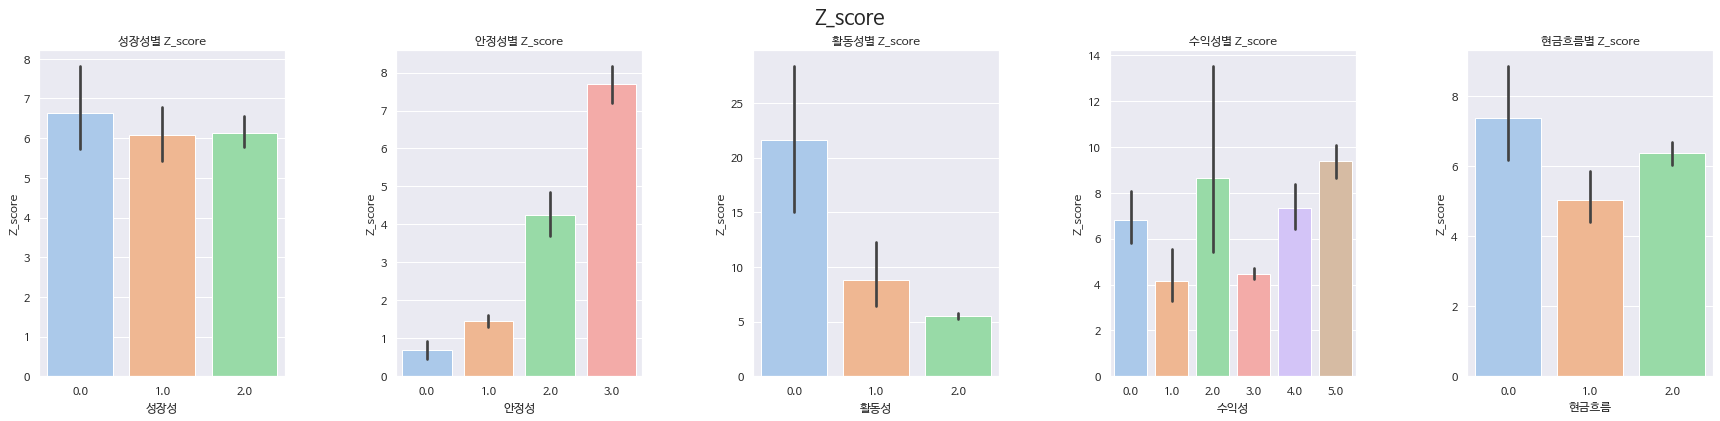

In [139]:
sns.set_palette('pastel')
fig, axes = plt.subplots(1, 5, figsize=(30, 6))
ax1 = sns.barplot(x = '성장성', y='Z_score', data = real_df,ax=axes[0])
ax1.set_title('성장성별 Z_score')
ax1.set(xlabel = '성장성', ylabel = 'Z_score')

ax1 = sns.barplot(x = '안정성', y='Z_score', data = real_df,ax=axes[1])
ax1.set_title('안정성별 Z_score')
ax1.set(xlabel = '안정성', ylabel = 'Z_score')

ax1 = sns.barplot(x = '활동성', y='Z_score', data = real_df,ax=axes[2])
ax1.set_title('활동성별 Z_score')
ax1.set(xlabel = '활동성', ylabel = 'Z_score')

ax1 = sns.barplot(x = '수익성', y='Z_score', data = real_df,ax=axes[3])
ax1.set_title('수익성별 Z_score')
ax1.set(xlabel = '수익성', ylabel = 'Z_score')

ax1 = sns.barplot(x = '현금흐름', y='Z_score', data = real_df,ax=axes[4])
ax1.set_title('현금흐름별 Z_score')
ax1.set(xlabel = '현금흐름', ylabel = 'Z_score')


plt.suptitle('Z_score', fontsize= 20)

plt.subplots_adjust(wspace = 0.45, hspace=0.45)

plt.show()

# F_score

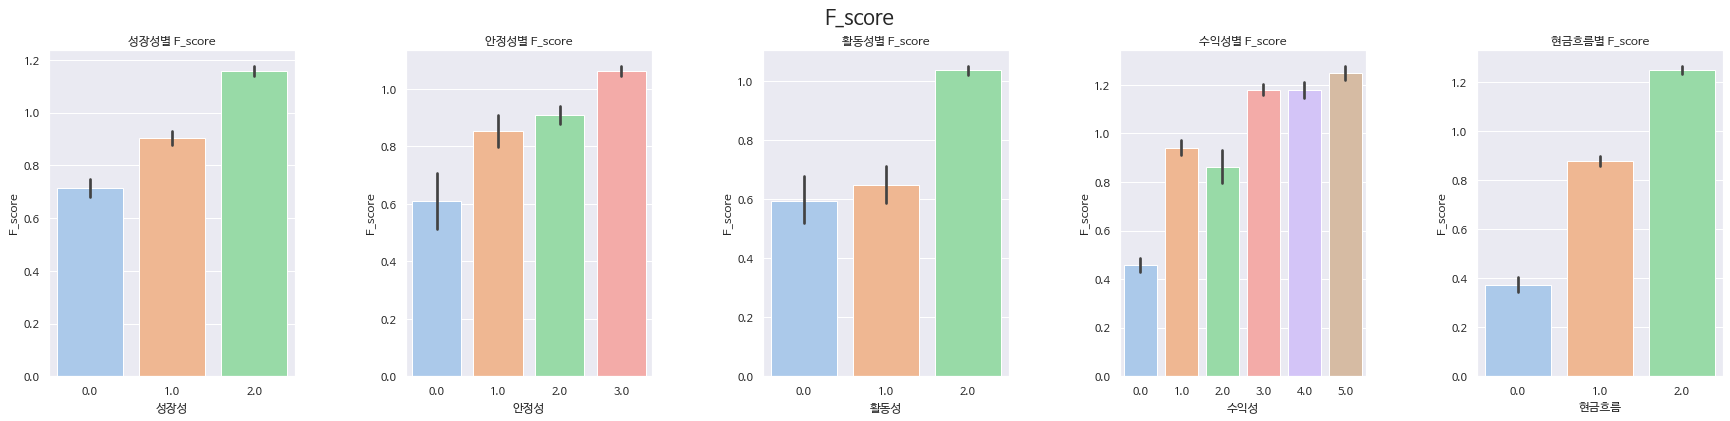

In [140]:
sns.set_palette('pastel')
fig, axes = plt.subplots(1, 5, figsize=(30, 6))
ax1 = sns.barplot(x = '성장성', y='F_score', data = real_df,ax=axes[0])
ax1.set_title('성장성별 F_score')
ax1.set(xlabel = '성장성', ylabel = 'F_score')

ax1 = sns.barplot(x = '안정성', y='F_score', data = real_df,ax=axes[1])
ax1.set_title('안정성별 F_score')
ax1.set(xlabel = '안정성', ylabel = 'F_score')

ax1 = sns.barplot(x = '활동성', y='F_score', data = real_df,ax=axes[2])
ax1.set_title('활동성별 F_score')
ax1.set(xlabel = '활동성', ylabel = 'F_score')

ax1 = sns.barplot(x = '수익성', y='F_score', data = real_df,ax=axes[3])
ax1.set_title('수익성별 F_score')
ax1.set(xlabel = '수익성', ylabel = 'F_score')

ax1 = sns.barplot(x = '현금흐름', y='F_score', data = real_df,ax=axes[4])
ax1.set_title('현금흐름별 F_score')
ax1.set(xlabel = '현금흐름', ylabel = 'F_score')


plt.suptitle('F_score', fontsize= 20)

plt.subplots_adjust(wspace = 0.45, hspace=0.45)

plt.show()

# O_score

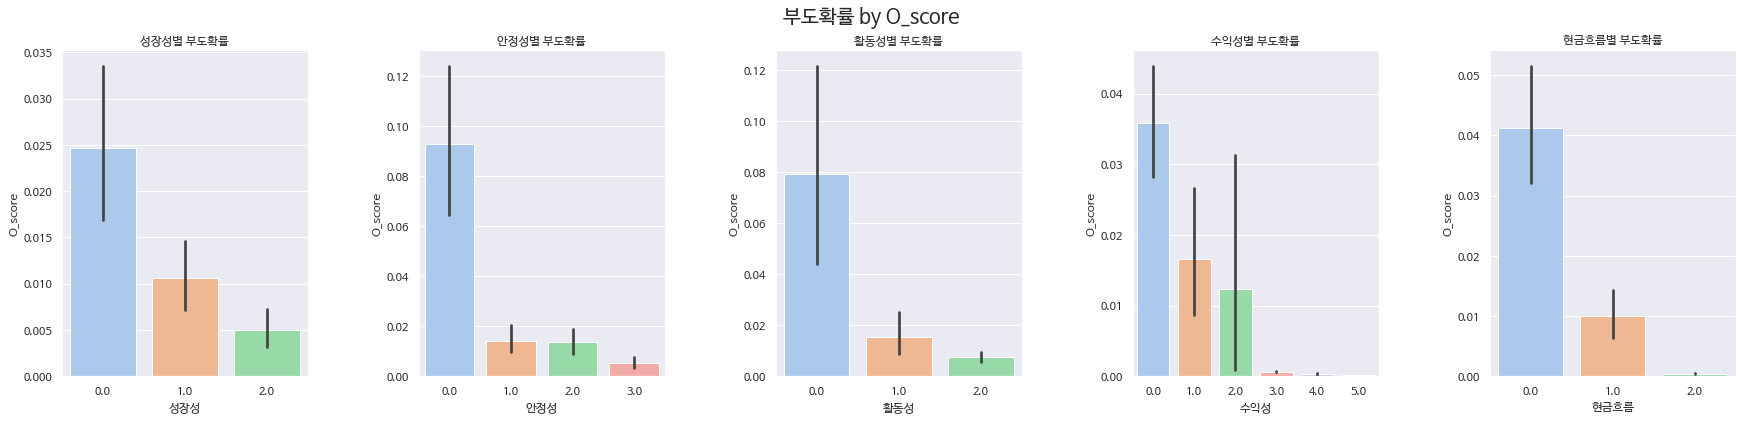

In [144]:
sns.set_palette('pastel')
fig, axes = plt.subplots(1, 5, figsize=(30, 6))
ax1 = sns.barplot(x = '성장성', y='부도확률_O_score', data = real_df,ax=axes[0])
ax1.set_title('성장성별 부도확률')
ax1.set(xlabel = '성장성', ylabel = 'O_score')

ax1 = sns.barplot(x = '안정성', y='부도확률_O_score', data = real_df,ax=axes[1])
ax1.set_title('안정성별 부도확률')
ax1.set(xlabel = '안정성', ylabel = 'O_score')

ax1 = sns.barplot(x = '활동성', y='부도확률_O_score', data = real_df,ax=axes[2])
ax1.set_title('활동성별 부도확률')
ax1.set(xlabel = '활동성', ylabel = 'O_score')

ax1 = sns.barplot(x = '수익성', y='부도확률_O_score', data = real_df,ax=axes[3])
ax1.set_title('수익성별 부도확률')
ax1.set(xlabel = '수익성', ylabel = 'O_score')

ax1 = sns.barplot(x = '현금흐름', y='부도확률_O_score', data = real_df,ax=axes[4])
ax1.set_title('현금흐름별 부도확률')
ax1.set(xlabel = '현금흐름', ylabel = 'O_score')


plt.suptitle('부도확률 by O_score', fontsize= 20)

plt.subplots_adjust(wspace = 0.45, hspace=0.45)

plt.show()